In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
# Loading the raw loan stats dataset
df = pd.read_csv("E:\LoanStats3a.csv",low_memory=False)

In [21]:
# Looking at the top 5 rows to understand data
pd.set_option('display.max_columns', None)

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,May-19,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Apr-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [7]:
df.shape

(42538, 144)

In [34]:
dict(df.dtypes)

{'loan_amnt': dtype('float64'),
 'funded_amnt': dtype('float64'),
 'funded_amnt_inv': dtype('float64'),
 'term': dtype('O'),
 'int_rate': dtype('O'),
 'installment': dtype('float64'),
 'grade': dtype('O'),
 'sub_grade': dtype('O'),
 'emp_title': dtype('O'),
 'emp_length': dtype('O'),
 'home_ownership': dtype('O'),
 'annual_inc': dtype('float64'),
 'verification_status': dtype('O'),
 'issue_d': dtype('O'),
 'loan_status': dtype('O'),
 'pymnt_plan': dtype('O'),
 'desc': dtype('O'),
 'purpose': dtype('O'),
 'title': dtype('O'),
 'zip_code': dtype('O'),
 'addr_state': dtype('O'),
 'dti': dtype('float64'),
 'delinq_2yrs': dtype('float64'),
 'earliest_cr_line': dtype('O'),
 'inq_last_6mths': dtype('float64'),
 'open_acc': dtype('float64'),
 'pub_rec': dtype('float64'),
 'revol_bal': dtype('float64'),
 'revol_util': dtype('O'),
 'total_acc': dtype('float64'),
 'initial_list_status': dtype('O'),
 'out_prncp': dtype('float64'),
 'out_prncp_inv': dtype('float64'),
 'total_pymnt': dtype('float64'

In [9]:
# Checking info of the raw dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Columns: 144 entries, id to settlement_term
dtypes: float64(115), object(29)
memory usage: 46.7+ MB


In [11]:
#checking for null values
df.isnull().sum()

id                       42537
member_id                42538
loan_amnt                    3
funded_amnt                  3
funded_amnt_inv              3
                         ...  
settlement_status        42378
settlement_date          42378
settlement_amount        42378
settlement_percentage    42378
settlement_term          42378
Length: 144, dtype: int64

In [12]:
# Total percentage of null values in the data
(df.isnull().sum().sum())/(df.shape[0]*df.shape[1])

0.6313577141483955

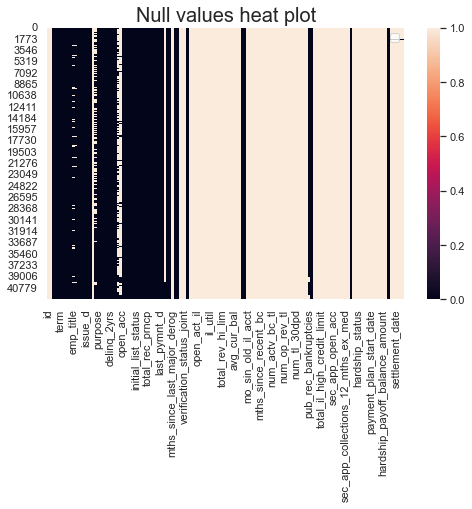

In [14]:
# Checking for null values using a heat map as a visualizing tool
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style('whitegrid')
sns.heatmap(df.isnull())
plt.title('Null values heat plot',fontdict={'fontsize': 20})
plt.legend(df.isnull())
plt.show()

In [16]:
#heatmap shows many null values..many to be dealt with carefully
# Creating a dataframe to display percentage of null values in each column
a = pd.DataFrame()
a['Percentage of null values']=['10% or less','20% or less','30% or less','40% or less','50% or less','60% or less','70% or less']

ten_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.1])
twenty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.2])
thirty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.3])
fourty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.4])
fifty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.5])
sixty_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.6])
seventy_percent = len(df.columns[((df.isnull().sum())/len(df)) < 0.7])


a['No.of columns'] = [ten_percent,twenty_percent,thirty_percent,fourty_percent,fifty_percent,sixty_percent,seventy_percent]
a

,Percentage of null values,No.of columns
0,10% or less,52
1,20% or less,52
2,30% or less,52
3,40% or less,53
4,50% or less,53
5,60% or less,53
6,70% or less,54


In [19]:
# Considering only those columns which have null values less than 40% in that particular column
df = pd.read_csv("E:\LoanStats3a.csv",low_memory=False)
df = df[df.columns[((df.isnull().sum())/len(df)) < 0.4]]
df.shape

(42538, 53)

In [22]:
#by considering columns with less number of null values we are able to decrease the total no of features from 144 to 53
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,May-19,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956.0,98.50%,10.0,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jun-17,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598.0,21%,37.0,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783.0,53.90%,38.0,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Apr-18,0.0,1.0,Individual,0.0,0.0,0.0,0.0,0.0,N,N


In [23]:
# Checking info of updated dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42538 entries, 0 to 42537
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

there are still null values especially in desc and emp_title


# Feature analysis

In [28]:
# 'term' feature
df.term.value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

In [29]:
#'grade' feature
df.grade.value_counts()

B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64

In [30]:
df.sub_grade.value_counts()

B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64

term has only two values so we can perform encoding on it, grade and sub_grade are also categorical so label encoding on them.

In [32]:
df.emp_title.value_counts()

US Army                             139
Bank of America                     115
IBM                                  72
Kaiser Permanente                    61
AT&T                                 61
                                   ... 
Regional Elite Airlines Services      1
Mass General Medical Group            1
Kontera                               1
Southeast Georgia Health ystem        1
Homemaker                             1
Name: emp_title, Length: 30658, dtype: int64

In [64]:
#instead of checking each column one by one
# Checking columns that are of dtype 'object'
df.columns[df.dtypes=='object']

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'revol_util', 'last_pymnt_d',
       'last_credit_pull_d'],
      dtype='object')

In [66]:
for i in df.columns[df.dtypes=='object']:
    print(df[i].value_counts())
    print('************************')

 36 months    31534
 60 months    11001
Name: term, dtype: int64
************************
10.99%    970
11.49%    837
13.49%    832
7.51%     787
7.88%     742
         ... 
17.46%      1
21.48%      1
24.40%      1
16.83%      1
16.20%      1
Name: int_rate, Length: 394, dtype: int64
************************
B    12389
A    10183
C     8740
D     6016
E     3394
F     1301
G      512
Name: grade, dtype: int64
************************
B3    2997
A4    2905
B5    2807
A5    2793
B4    2590
C1    2264
C2    2157
B2    2113
B1    1882
A3    1823
C3    1658
A2    1520
D2    1485
C4    1370
D3    1322
C5    1291
A1    1142
D4    1140
D1    1053
D5    1016
E1     884
E2     791
E3     668
E4     552
E5     499
F1     392
F2     308
F3     236
F4     211
F5     154
G1     141
G2     107
G4      99
G5      86
G3      79
Name: sub_grade, dtype: int64
************************
10+ years    9369
< 1 year     5062
2 years      4743
3 years      4364
4 years      3649
1 year       3595
5 years      

In [67]:
#based on above result we will drop some columns
#df.reindex()
df.drop(['emp_title','pymnt_plan','desc','title','zip_code','addr_state','initial_list_status','application_type','hardship_flag','debt_settlement_flag'],axis=1,inplace=True)
#df.columns[df.dtypes == 'float64']

KeyError: "['emp_title' 'pymnt_plan' 'desc' 'title' 'zip_code' 'addr_state'\n 'initial_list_status' 'application_type' 'hardship_flag'\n 'debt_settlement_flag'] not found in axis"

In [62]:
#we checked columns of object type, now similarly we will check for some numerical columns
col = ['acc_now_delinq','chargeoff_within_12_mths','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens']
for i in col:
    print(df[i].value_counts())
    print('************************')

KeyError: 'acc_now_delinq'

In [52]:
# There are also few not so useful numerical columns.We are dropping these numerical columns after examining them. 

df.drop(['acc_now_delinq''chargeoff_within_12_mths','collection_recovery_fee','collections_12_mths_ex_med','delinq_amnt','policy_code','tax_liens'],axis=1,inplace=True)


KeyError: "['acc_now_delinqchargeoff_within_12_mths' 'collection_recovery_fee'\n 'collections_12_mths_ex_med' 'delinq_amnt' 'policy_code' 'tax_liens'] not found in axis"

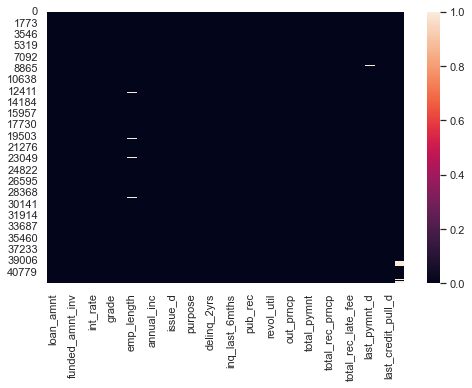

In [68]:
# Checking for null values in the updated dataframe
sns.heatmap(df.isnull())
plt.show()

In [70]:
df.isnull().sum()

loan_amnt                  3
funded_amnt                3
funded_amnt_inv            3
term                       3
int_rate                   3
installment                3
grade                      3
sub_grade                  3
emp_length              1115
home_ownership             3
annual_inc                 7
verification_status        3
issue_d                    3
loan_status                3
purpose                    3
dti                        3
delinq_2yrs               32
earliest_cr_line          32
inq_last_6mths            32
open_acc                  32
pub_rec                   32
revol_bal                  3
revol_util                93
total_acc                 32
out_prncp                  3
out_prncp_inv              3
total_pymnt                3
total_pymnt_inv            3
total_rec_prncp            3
total_rec_int              3
total_rec_late_fee         3
recoveries                 3
last_pymnt_d              86
last_pymnt_amnt            3
last_credit_pu

In [71]:
# Displaying all the columns

pd.set_option('display.max_columns', None)

df.head(2)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0,Jan-85,1.0,3.0,0.0,13648.0,83.70%,9.0,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,Jan-15,171.62,May-19,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0,Apr-99,5.0,3.0,0.0,1687.0,9.40%,4.0,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,Apr-13,119.66,Oct-16,0.0


In [72]:
df.shape
# We were able to decrease no.of columns from 53 to 35 and we will still try to decrease the no.of columns.


(42538, 36)

In [73]:
# Checking for null values
# Percentage of null values
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

,Percentage of null values
pub_rec_bankruptcies,3.215948
emp_length,2.621186
revol_util,0.218628
last_pymnt_d,0.202172
delinq_2yrs,0.075227
earliest_cr_line,0.075227
inq_last_6mths,0.075227
open_acc,0.075227
pub_rec,0.075227
total_acc,0.075227


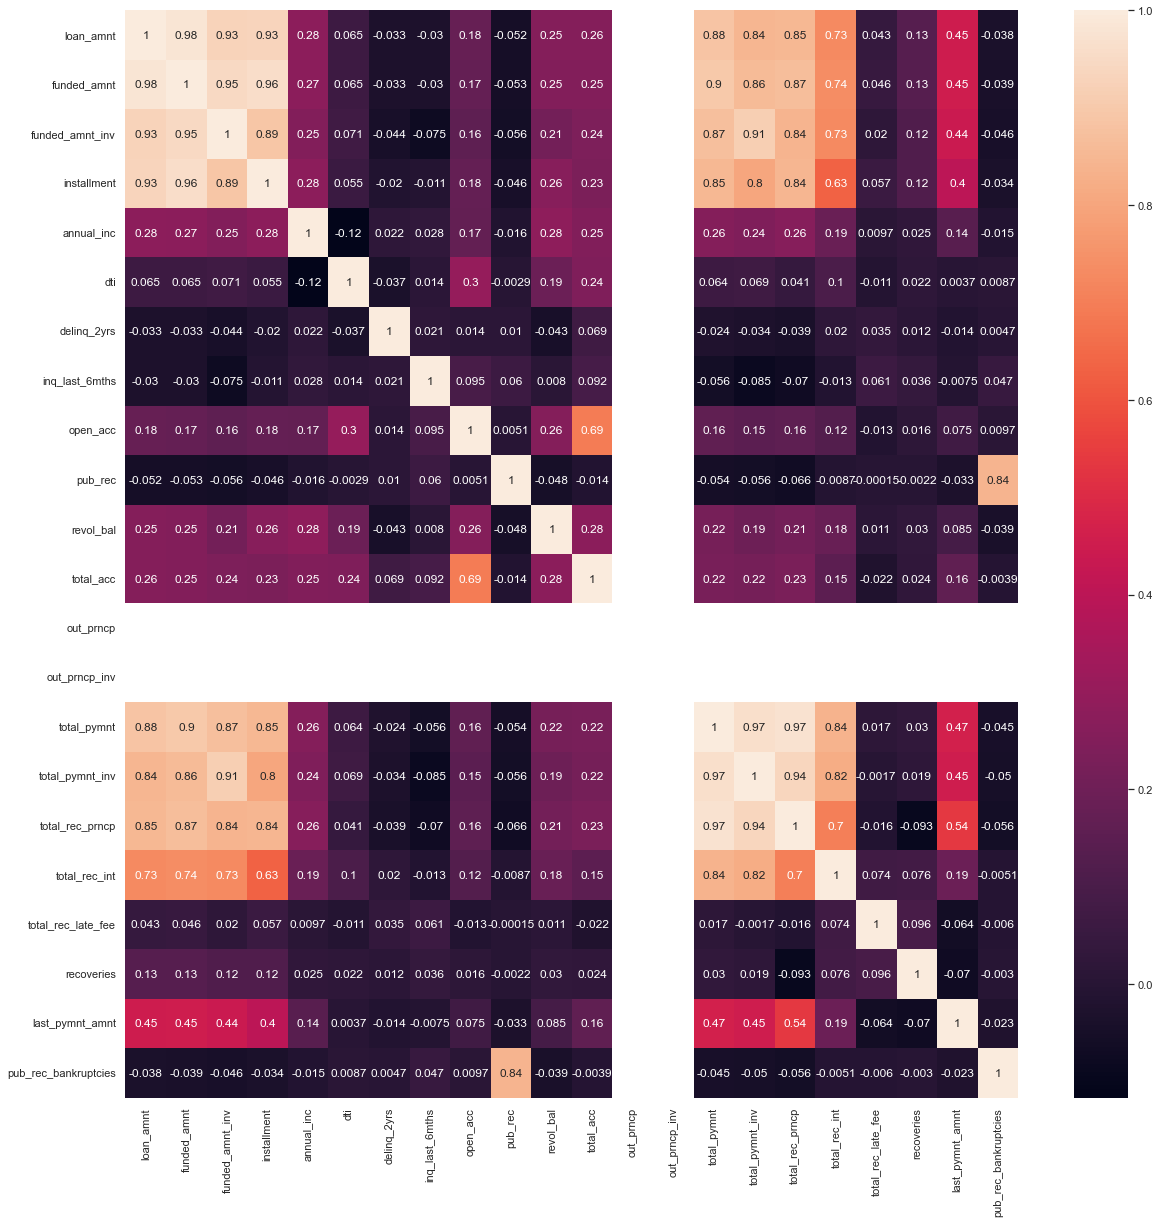

In [74]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

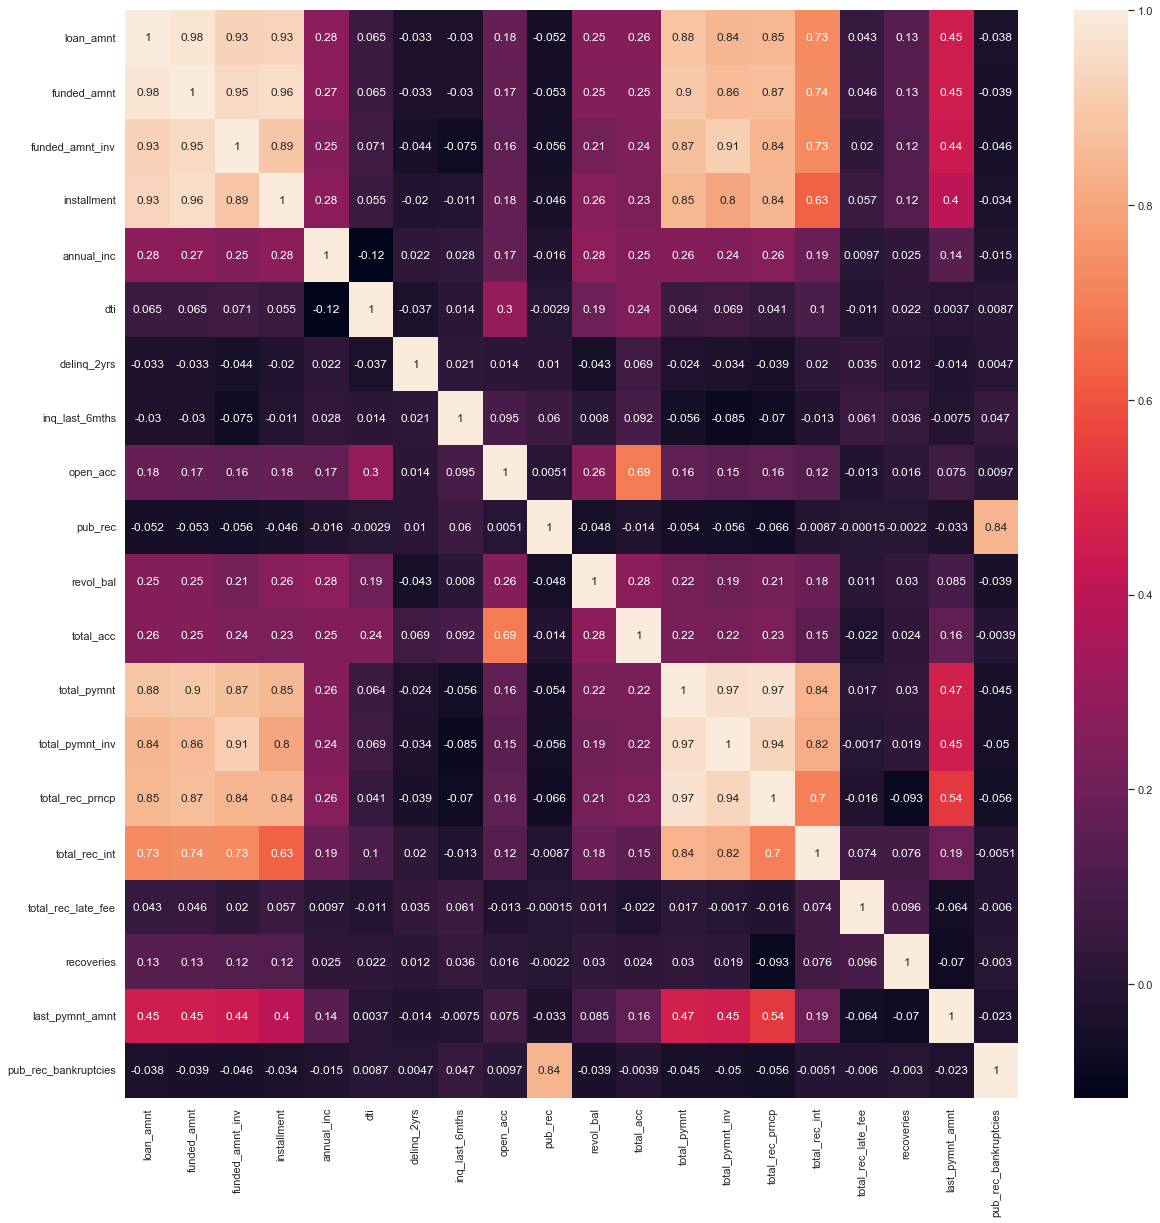

In [75]:
# Dropping those columns to avoid multi-collinearity
df.drop('out_prncp_inv',axis=1,inplace = True)
df.drop('out_prncp',axis=1,inplace = True)
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr(),annot=True)
plt.show()

We can see some columns having high correlation but we aren't dropping these columns. These columns might not be even considered while solving our particular question. For example, we will not consider any future transactions(like total_pymnt.total_pymnt_inv) when tring to classify if the loan will be paid back by customer.

In [76]:
# Now that we have come to a conclusion on which columns to consider in the final data frame, we can drop rows which have only null values.
df.dropna(how='all',inplace=True) 
# Dropping rows which have only null values in all the columns

In [77]:
# Checking the final shape of the dataframe
df.shape

(42535, 34)

In [78]:
# Checking if still there are any null values
df.isnull().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1112
home_ownership             0
annual_inc                 4
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
dti                        0
delinq_2yrs               29
earliest_cr_line          29
inq_last_6mths            29
open_acc                  29
pub_rec                   29
revol_bal                  0
revol_util                90
total_acc                 29
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
total_rec_late_fee         0
recoveries                 0
last_pymnt_d              83
last_pymnt_amnt            0
last_credit_pull_d         4
pub_rec_bankruptcies    1365
dtype: int64

There are still few null values which we will deal in the end after pre-processing few more numerical columns.

In [79]:
# The next step is to convert categorical columns and date-time columns to numerical columns
# Checking 5 point summary
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,41170.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,9.343951,0.058156,1.429786e+04,22.124406,12020.414206,11312.953251,9675.675936,2239.981444,1.516890,103.240029,2613.245652,0.045227
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,1.527455,4.496274,0.245713,2.201844e+04,11.592811,9094.890303,9038.639113,7105.750304,2585.057393,7.830064,737.171320,4385.066535,0.208737
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,5465.685189,4793.115000,4400.000000,657.100000,0.000000,0.000000,211.050000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,9.000000,0.000000,8.821000e+03,20.000000,9682.251696,8956.080000,8000.000000,1339.160000,0.000000,0.000000,528.360000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,12.000000,0.000000,1.725100e+04,29.000000,16427.850065,15544.335000,13499.995000,2803.090000,0.000000,0.000000,3170.220000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,47.000000,5.000000,1.207359e+06,90.000000,58886.473430,58563.680000,35000.020000,23886.470000,209.000000,29623.350000,36115.200000,2.000000


In [80]:
# Converting objects to datetime columns
col = ['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
for i in col:
    df[i] = pd.to_datetime(df[i].astype('str'), format='%b-%y', yearfirst=False)

In [81]:
# Checking the new datetime columns
df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,2019-05-01
1,2011-12-01,1999-04-01,2013-04-01,2016-10-01
2,2011-12-01,2001-11-01,2014-06-01,2017-06-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2017-01-01,2018-04-01
...,...,...,...,...
42533,2007-06-01,NaT,2008-03-01,2013-02-01
42534,2007-06-01,NaT,2010-06-01,2014-09-01
42535,2007-06-01,NaT,2010-06-01,2007-05-01
42536,2007-06-01,NaT,2010-06-01,2007-08-01


In [82]:
# Considering only year of joining for 'earliest_cr_line' column.
df['earliest_cr_line'] = pd.DatetimeIndex(df['earliest_cr_line']).year  

In [83]:
# Adding new features by getting month and year from issue_d,last_pymnt_d and last_credit_pull_d columns
df['issue_d_year'] = pd.DatetimeIndex(df['issue_d']).year  
df['issue_d_month'] = pd.DatetimeIndex(df['issue_d']).month  
df['last_pymnt_d_year'] = pd.DatetimeIndex(df['last_pymnt_d']).year  
df['last_pymnt_d_month'] = pd.DatetimeIndex(df['last_pymnt_d']).month 
df['last_credit_pull_d_year'] = pd.DatetimeIndex(df['last_credit_pull_d']).year  
df['last_credit_pull_d_month'] = pd.DatetimeIndex(df['last_credit_pull_d']).month 

df.earliest_cr_line = 2019 - (df.earliest_cr_line)
df.issue_d_year = 2019 - (df.issue_d_year)

df.last_pymnt_d_year = 2019 - (df.last_pymnt_d_year)
df.last_credit_pull_d_year = 2019 - (df.last_credit_pull_d_year)

In [84]:
# Dropping the original features to avoid data redundancy
df.drop(['issue_d','last_pymnt_d','last_credit_pull_d'],axis=1,inplace=True)

In [85]:
# Converting term and int_rate to numerical columns
df.term = df.term.apply(lambda x:x[:2])
df.term = df.term.astype('float')
df.int_rate = df.int_rate.apply(lambda x:x[:2])
df.int_rate = df.int_rate.astype('float')

In [86]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['home_ownership','verification_status','purpose'],drop_first = True)


In [87]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.grade)
le.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [88]:
df.grade = le.transform(df.grade)

In [89]:
# Label encoding on grade column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.sub_grade)
le.classes_

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [90]:
df.sub_grade = le.transform(df.sub_grade)

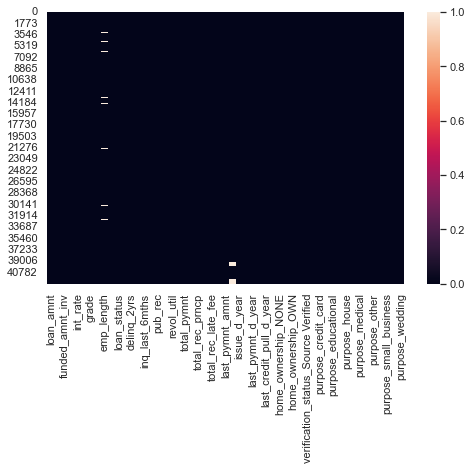

In [91]:
# Checking for null values in the updated dataframe
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(df.isnull())
plt.show()

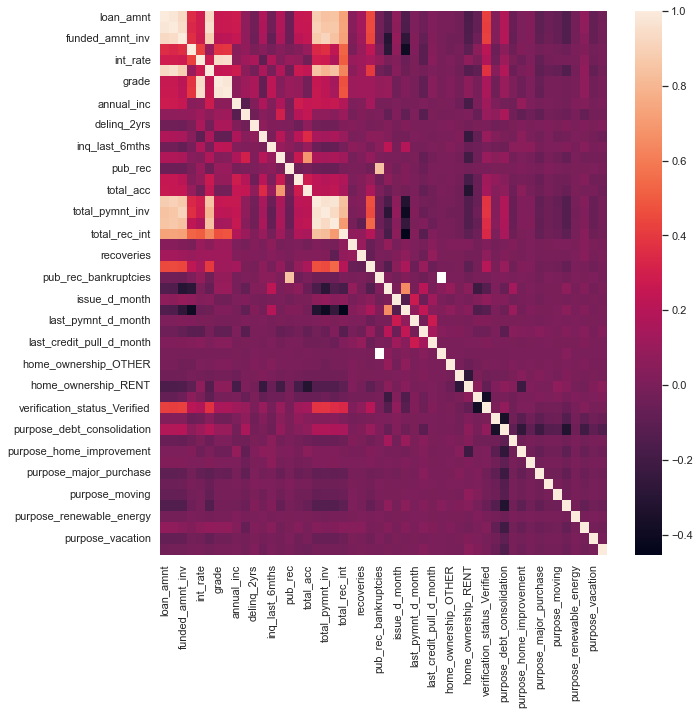

In [92]:
# Checking correlation  and using heatmap to visualise it.
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')
# Heatmap
sns.heatmap(df.corr())
plt.show()

## Dealing with null values:

In [93]:
# Checking for null values
# Percentage of null values
print('Percentage of null values:')
a = (df.isnull().sum()/df.shape[0])*100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'],ascending=False)

Percentage of null values:


,Percentage of null values
pub_rec_bankruptcies,3.209122
emp_length,2.614318
revol_util,0.211590
last_pymnt_d_year,0.195133
last_pymnt_d_month,0.195133
delinq_2yrs,0.068179
earliest_cr_line,0.068179
inq_last_6mths,0.068179
open_acc,0.068179
pub_rec,0.068179


In [94]:
# Dropping the 29 rows which have null values in 4 columns
df = df[df['delinq_2yrs'].notnull()]

In [95]:
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10+ years,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.70%,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,< 1 year,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.40%,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10+ years,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.50%,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10+ years,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21%,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1 year,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.90%,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [96]:
df.isnull().sum()

loan_amnt                                 0
funded_amnt                               0
funded_amnt_inv                           0
term                                      0
int_rate                                  0
installment                               0
grade                                     0
sub_grade                                 0
emp_length                             1112
annual_inc                                0
loan_status                               0
dti                                       0
delinq_2yrs                               0
earliest_cr_line                          0
inq_last_6mths                            0
open_acc                                  0
pub_rec                                   0
revol_bal                                 0
revol_util                               61
total_acc                                 0
total_pymnt                               0
total_pymnt_inv                           0
total_rec_prncp                 

In [98]:
# As the null values in these columns are less than 0.5% of the size, we are simply imputing null values with median.
df['last_pymnt_d_year'].fillna(df['last_pymnt_d_year'].median(),inplace=True)
df['last_pymnt_d_month'].fillna(df['last_pymnt_d_month'].median(),inplace=True)
df['last_credit_pull_d_year'].fillna(df['last_credit_pull_d_year'].median(),inplace=True)
df['last_credit_pull_d_month'].fillna(df['last_credit_pull_d_month'].median(),inplace=True)


In [100]:
# Filling null values with median(string) which is close to 50.
df.revol_util.fillna('50%',inplace=True)  

# Converting string to float
df.revol_util = df.revol_util.apply(lambda x:x[:-1])
df.revol_util = df.revol_util.astype('float')

TypeError: 'float' object is not subscriptable

In [101]:
df.pub_rec_bankruptcies.value_counts()

0.0    39316
1.0     1846
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [102]:
# pub_rec_bankruptcies column is highly imbalanced.
#So, it is better to fill it with median(0) as even after building model the model will be skewed very much towards 0.
df['pub_rec_bankruptcies'].fillna(df['pub_rec_bankruptcies'].median(),inplace=True)


In [104]:
# seperating null values by assigning a random string
df['emp_length'].fillna('5000',inplace=True) 
# Filling less than one year as 0 years of experience
df.emp_length.replace({'10+ years':'10 years','< 1 year':'0 years'},inplace=True) 
# Converting it's dtype to float
df.emp_length = df.emp_length.apply(lambda x:x[:2])
df.emp_length = df.emp_length.astype('float')


TypeError: 'float' object is not subscriptable

In [105]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10.0,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10.0,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1.0,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [107]:
# Building models to fill null values in emp_length columns
df2 = df.drop('loan_status',axis=1)
df2_train = df2[df2['emp_length'] !=50]
df2_test = df2[df2['emp_length'] ==50]

In [109]:
# Assigning train and test to variables
x_train = df2_train.drop('emp_length',axis=1)
y_train = df2_train.emp_length
x_test = df2_test.drop('emp_length',axis=1)

In [110]:
df2_train.drop('emp_length',axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,24000.0,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,30000.0,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,12252.0,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,49200.0,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,80000.0,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42511,5350.0,5350.0,625.0,3.0,13.0,180.57,3,19,4000.0,15.00,0.0,13.0,1.0,1.0,0.0,0.0,50.0,1.0,6486.773238,757.80,5350.00,1121.77,15.00,0.0,1056.94,0.0,12,7,9.0,2.0,6.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42513,10000.0,10000.0,350.0,3.0,14.0,345.18,4,24,50000.0,7.22,2.0,20.0,0.0,14.0,0.0,10025.0,85.0,20.0,12622.317950,441.78,10000.00,2570.54,51.78,0.0,1605.65,0.0,12,7,9.0,8.0,9.0,8.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
42514,2000.0,2000.0,1275.0,3.0,7.0,61.87,0,0,150000.0,5.60,0.0,35.0,0.0,7.0,0.0,150786.0,2.2,16.0,2227.023184,1419.73,2000.00,227.02,0.00,0.0,63.59,0.0,12,7,9.0,7.0,9.0,6.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
42515,6000.0,6000.0,650.0,3.0,10.0,195.28,2,11,20000.0,12.90,0.0,23.0,4.0,5.0,0.0,13660.0,66.0,6.0,7029.871272,761.57,6000.00,1029.87,0.00,0.0,197.36,0.0,12,6,9.0,6.0,5.0,10.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [112]:
# We are running a decision tree classifier to predict the missing values in 'emp_length' column
from sklearn.tree import DecisionTreeClassifier
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(df2_train.drop('emp_length',axis=1), y_train)
giniPred = giniDecisionTree.predict(x_test)

In [113]:
# Predicted 'emp_length'
giniPred

array([10.,  2.,  2., ..., 10., 10.,  2.])

In [115]:
# Replacing the randomly fed value with predicted values
df.emp_length.replace({50:giniPred},inplace=True)

In [117]:
df.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10.0,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10.0,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1.0,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [119]:
# Last check to find if there are any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42506 entries, 0 to 42516
Data columns (total 53 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            42506 non-null  float64
 1   funded_amnt                          42506 non-null  float64
 2   funded_amnt_inv                      42506 non-null  float64
 3   term                                 42506 non-null  float64
 4   int_rate                             42506 non-null  float64
 5   installment                          42506 non-null  float64
 6   grade                                42506 non-null  int32  
 7   sub_grade                            42506 non-null  int32  
 8   emp_length                           42506 non-null  float64
 9   annual_inc                           42506 non-null  float64
 10  loan_status                          42506 non-null  object 
 11  dti                         

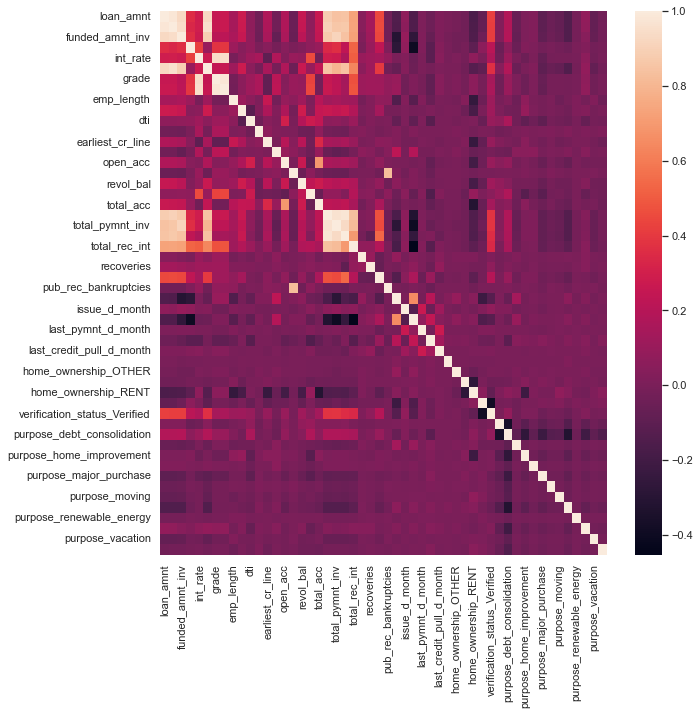

In [121]:
# Heatmap of correlation of the final dataframe
sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid')

sns.heatmap(df.corr())
plt.show()

In [122]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,last_pymnt_d_year,last_pymnt_d_month,last_credit_pull_d_year,last_credit_pull_d_month,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,3.0,10.0,162.87,1,6,10.0,24000.0,Fully Paid,27.65,0.0,34.0,1.0,3.0,0.0,13648.0,83.7,9.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,171.62,0.0,8,12,4.0,1.0,0.0,5.0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,6.0,15.0,59.83,2,13,0.0,30000.0,Charged Off,1.00,0.0,20.0,5.0,3.0,0.0,1687.0,9.4,4.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,119.66,0.0,8,12,6.0,4.0,3.0,10.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,3.0,15.0,84.33,2,14,10.0,12252.0,Fully Paid,8.72,0.0,18.0,2.0,2.0,0.0,2956.0,98.5,10.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,649.91,0.0,8,12,5.0,6.0,2.0,6.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,10000.0,10000.0,3.0,13.0,339.31,2,10,10.0,49200.0,Fully Paid,20.00,0.0,23.0,1.0,10.0,0.0,5598.0,21.0,37.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,357.48,0.0,8,12,4.0,1.0,3.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000.0,3000.0,3000.0,6.0,12.0,67.79,1,9,1.0,80000.0,Fully Paid,17.94,0.0,23.0,0.0,15.0,0.0,27783.0,53.9,38.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,67.30,0.0,8,12,2.0,1.0,1.0,4.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [124]:
df.shape

(42506, 53)

In [126]:
# Storing the final dataframe into a csv file 
df.to_csv('pre_processed.csv',index=False)